In [1]:
import numpy as np
import pandas as pd
import pickle 

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

# import here in this order otherwise crashes the kernel, 
# something wrong with shapely and pysal, 
# shapely needs to be imported before pysal? 
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon

import sys
sys.path.append('../')
import scripts.outliers as outliers
import scripts.utils as utils
import scripts.interactive_plot as interactive_plot

## Load data

In [ ]:
DATA_FILE = '../data/lda_data_8.pickle'
METADATA_FILE = '../data/metadata.csv'

dataset, ddf, w_dict = outliers.load_data(DATA_FILE, METADATA_FILE)
X_list, Y, Yaudio = dataset
X = np.concatenate(X_list, axis=1)

## Outliers at the recording level

most outliers 
           Country  Outliers  N_Country  N_Outliers
136       Botswana  0.611111         90          55
72     Ivory Coast  0.600000         15           9
95            Chad  0.545455         11           6
43           Benin  0.538462         26          14
86          Gambia  0.500000         50          25
20        Pakistan  0.494505         91          45
106          Nepal  0.473684         95          45
78     El Salvador  0.454545         33          15
64      Mozambique  0.441176         34          15
135  French Guiana  0.428571         28          12
least outliers 
            Country  Outliers  N_Country  N_Outliers
1         Lithuania  0.000000         47           0
119         Denmark  0.000000         16           0
27      South Korea  0.000000         11           0
120      Kazakhstan  0.011364         88           1
31   Czech Republic  0.024390         41           1
15      Netherlands  0.029851         67           2
30      Afghanistan  0.041

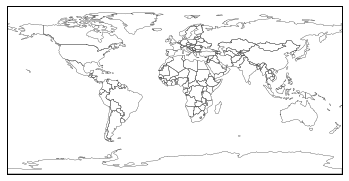

In [6]:
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
outliers.print_most_least_outliers_topN(df_global, N=10)
tab_all = interactive_plot.plot_outliers_world_figure(MD, MD>threshold, ddf)
print "n outliers " + str(len(np.where(MD>threshold)[0]))

### Outliers for different sets of features

outliers rhythm
most outliers 
      Country  Outliers  N_Country  N_Outliers
43      Benin  0.500000         26          13
136  Botswana  0.488889         90          44
106     Nepal  0.421053         95          40
84     Belize  0.418605         43          18
19      Yemen  0.416667         12           5
least outliers 
                Country  Outliers  N_Country  N_Outliers
28           Tajikistan         0         19           0
119             Denmark         0         16           0
96              Uruguay         0         31           0
25   Republic of Serbia         0         16           0
27          South Korea         0         11           0
outliers melody
most outliers 
      Country  Outliers  N_Country  N_Outliers
117  Zimbabwe  0.533333         15           8
96    Uruguay  0.483871         31          15
68     Guinea  0.454545         11           5
63    Senegal  0.390244         41          16
86     Gambia  0.380000         50          19
least outliers 


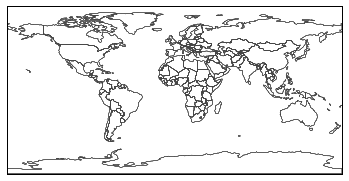

In [10]:
# outliers for features
feat = X_list
feat_labels = ['rhythm', 'melody', 'timbre', 'harmony']
tabs_feat = []
for i in range(len(feat)):
    print 'outliers', feat_labels[i]
    XX = feat[i]
    df_feat, threshold, MD = outliers.get_outliers_df(XX, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_feat, N=5)
    tabs_feat.append(interactive_plot.plot_outliers_world_figure(MD, MD>threshold, ddf))

Output the interactive plot of music outliers in .html.

In [42]:
interactive_plot.plot_tabs(tab_all, tabs_feat, out_file="../demo/outliers.html")

### Outliers wrt spatial neighbourhoods

In [11]:
df_local = outliers.get_local_outliers_df(X, Y, w_dict)
outliers.print_most_least_outliers_topN(df_local, N=10)

most outliers 
         Country  Outliers  N_Country  N_Outliers
46         China  0.260000        100          26
67        Brazil  0.240000        100          24
101     Colombia  0.211111         90          19
64    Mozambique  0.205882         34           7
76          Iran  0.188679         53          10
65        Uganda  0.176471         85          15
27         Kenya  0.164948         97          16
126  South Sudan  0.163043         92          15
24    Azerbaijan  0.153846         13           2
23         India  0.147368         95          14
least outliers 
             Country  Outliers  N_Country  N_Outliers
0             Canada         0        100           0
95          Portugal         0        100           0
94              Iraq         0         87           0
93           Grenada         0         37           0
90  French Polynesia         0         15           0
89           Croatia         0         31           0
88           Morocco         0         40

## Outliers at the country level

First, cluster recordings in K clusters (select best K based on silhouette score).

In [22]:
centroids, cl_pred = outliers.get_country_clusters(X, bestncl=None, min_ncl=10, max_ncl=30)
ddf['Clusters'] = cl_pred
print len(np.unique(cl_pred))
outliers.print_clusters_metadata(ddf, cl_pred)

\begin{tabular}{llll}
\toprule
{} &                  0 &                          1 &                      2 \\
\midrule
0 &    (Swaziland, 12) &                (Ghana, 13) &         (Botswana, 21) \\
1 &     (Pakistan, 17) &              (Ireland, 21) &            (Nepal, 32) \\
2 &     (Pakistan, 35) &               (Turkey, 41) &             (Iraq, 57) \\
3 &     (Portugal, 29) &          (Switzerland, 32) &          (Austria, 53) \\
4 &        (Nepal, 22) &                 (Cuba, 24) &           (Zambia, 32) \\
5 &  (South Sudan, 36) &         (Sierra Leone, 37) &          (Lesotho, 45) \\
6 &       (Mexico, 40) &  (Trinidad and Tobago, 53) &       (Kazakhstan, 67) \\
7 &        (Japan, 34) &            (Australia, 46) &  (Solomon Islands, 54) \\
8 &  (South Sudan, 56) &               (Canada, 59) &           (Norway, 62) \\
9 &       (Russia, 34) &             (Portugal, 38) &          (Ukraine, 48) \\
\bottomrule
\end{tabular}



Get histogram of cluster mappings for each country.

In [12]:
cluster_freq = utils.get_cluster_freq_linear(X, Y, centroids)
cluster_freq.head()

,labels,0,1,2,3,4,5,6,7,8,9
0,Afghanistan,-0.178780,-0.749647,0.136915,0.621761,-0.262999,-0.787477,0.768288,-0.085239,-0.655115,0.963578
1,Algeria,-0.290468,0.078528,0.238922,0.318331,-0.052201,-0.282315,0.034413,0.059122,-0.447833,0.454106
2,Angola,0.216456,0.036044,-0.233713,-0.304075,-0.095813,0.635134,-0.477930,-0.013959,0.108950,0.092726
3,Antigua and Barbuda,-0.074287,-0.983106,-0.434072,0.369776,0.028673,-1.198823,2.323036,-0.157340,-0.393111,0.047796
4,Argentina,-1.114361,-1.762123,-2.140859,0.330966,-0.097518,-1.366396,0.857294,0.246195,1.315376,1.081196
